In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#display options
pd.options.display.float_format = '{:.3f}'.format

In [3]:
#load dataset
df_books = pd.read_csv('books.csv')

In [4]:
df_books[df_books['ratings_count'] == 0].count() / len(df_books) * 100

bookID               0.838
title                0.838
authors              0.838
average_rating       0.838
isbn                 0.838
isbn13               0.838
language_code        0.838
# num_pages          0.838
ratings_count        0.838
text_reviews_count   0.838
dtype: float64

In [5]:
#some light cleaning to remove books with 0 ratings - and thus a  0 score average
df = df_books.loc[df_books.ratings_count > 0]
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,34523,The Flying Sorcerers: More Comic Tales of Fantasy,Peter Haining-Roald Dahl-Terry Pratchett-Angel...,3.980,1857237250,9781860000000.000,eng,383,2197,17
1,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,3.600,1593600119,9781590000000.000,eng,400,25,4
2,22128,Patriots (The Coming Collapse),James Wesley,3.630,156384155X,9781560000000.000,eng,342,38,4
4,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.560,439785960,9780440000000.000,eng,652,1944099,26249
5,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.490,439358078,9780440000000.000,eng,870,1996446,27613


In [6]:
df = df.rename(columns={'# num_pages' : 'num_pages'})

In [7]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,13604.000,13604.000,13604.000,13604.000,13604.000,13604.000
mean,22139.232,3.941,9763870103426.695,342.980,17909.216,537.949
std,13694.647,0.298,400373556612.290,252.630,113401.649,2538.754
min,1.000,1.000,8987059752.000,0.000,1.000,0.000
25%,10610.000,3.770,9780350000000.000,197.000,88.000,8.000
50%,21282.500,3.960,9780600000000.000,302.000,650.000,41.000
75%,33279.750,4.130,9780940000000.000,421.250,4802.750,225.000
max,47709.000,5.000,9790010000000.000,6576.000,5629932.000,93619.000


In [8]:
df.language_code.value_counts()

eng      10515
en-US     1700
spa        407
en-GB      340
ger        232
fre        202
jpn         63
por         27
mul         21
ita         18
zho         15
grc         10
en-CA        9
rus          7
nl           7
swe          6
glg          4
tur          3
lat          3
enm          3
cat          3
ara          2
gla          1
nor          1
ale          1
dan          1
wel          1
msa          1
heb          1
Name: language_code, dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100

bookID               0.000
title                0.000
authors              0.000
average_rating       0.000
isbn                 0.000
isbn13               0.000
language_code        0.000
num_pages            0.000
ratings_count        0.000
text_reviews_count   0.000
dtype: float64

In [10]:
#change some of the language codes
df['language_code'] = df['language_code'].apply(lambda x: 'eng' if x[:2] == 'en' else x)

This all seems pretty clean! Let's do some feature engineering and then some EDA!

In [11]:
df.language_code.value_counts()

eng    12567
spa      407
ger      232
fre      202
jpn       63
por       27
mul       21
ita       18
zho       15
grc       10
rus        7
nl         7
swe        6
glg        4
tur        3
lat        3
cat        3
ara        2
gla        1
nor        1
heb        1
ale        1
wel        1
dan        1
msa        1
Name: language_code, dtype: int64

In [12]:
cont_cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']

In [13]:
import scipy.stats as stats

The coefficient is 1.0


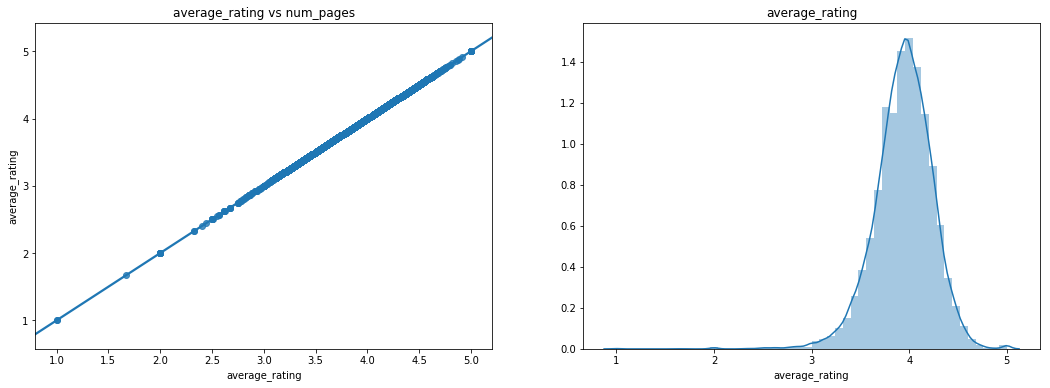

The coefficient is 0.18650740269904317


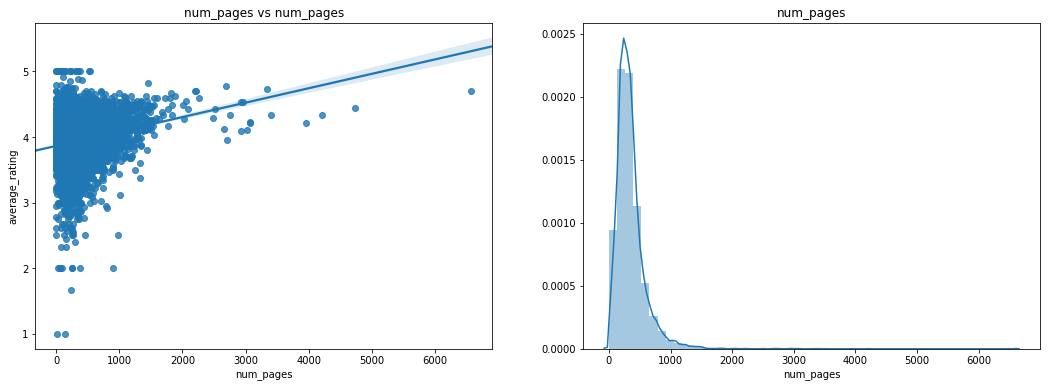

The coefficient is 0.04442567407671496


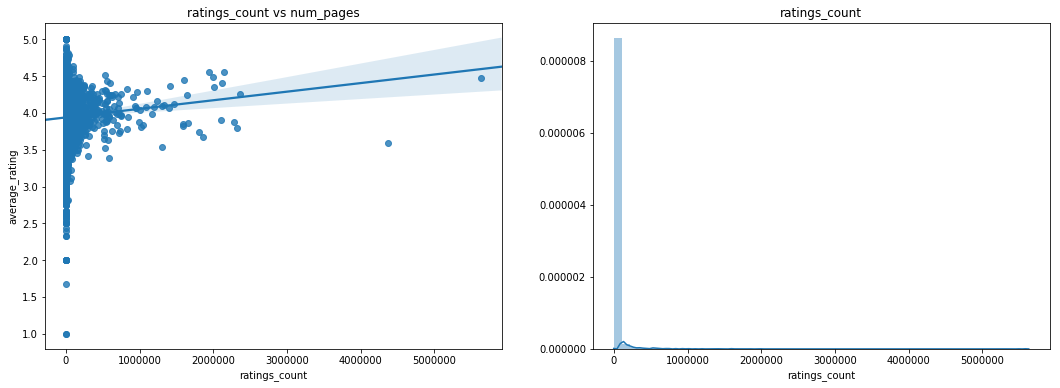

The coefficient is 0.03711990759735544


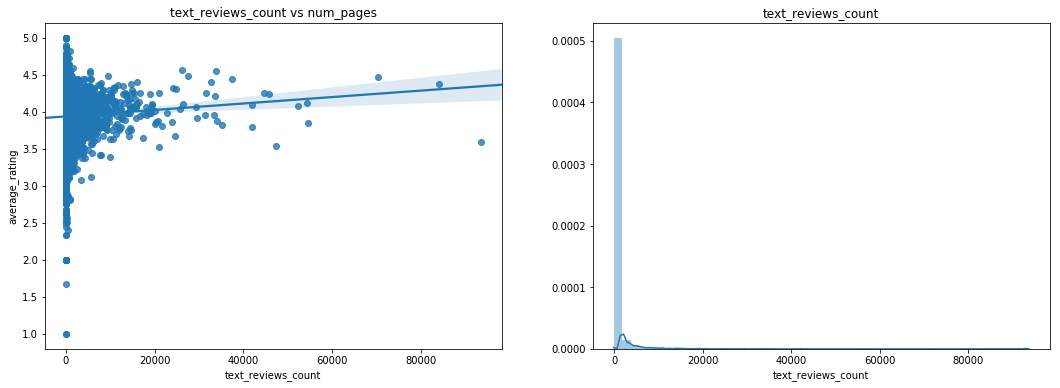

In [14]:
for column in cont_cols:
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    corr, p_value = stats.pearsonr(df['average_rating'], df[column])
    print('The coefficient is {}'.format(corr))
    sns.regplot(x=column, y='average_rating', data=df)
    plt.title('{} vs num_pages'.format(column))
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[column])
    plt.title('{}'.format(column))
    
    plt.show()

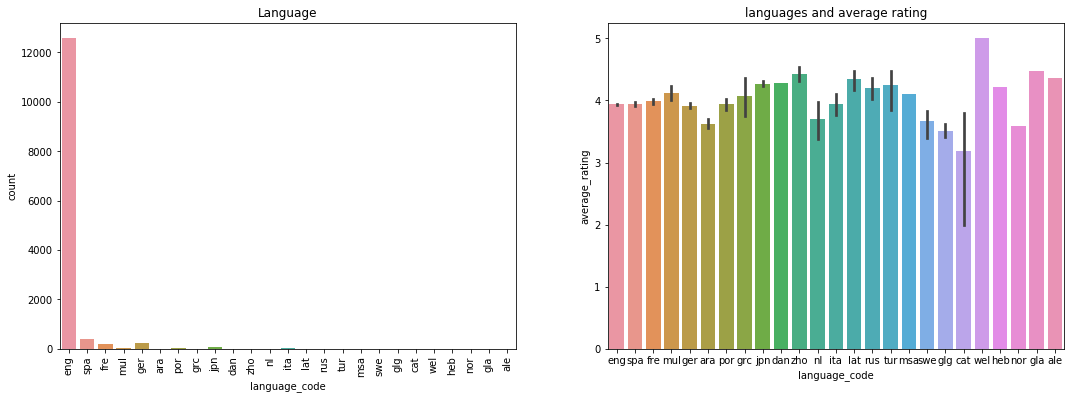

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(df['language_code'])
plt.xticks(rotation='vertical')
plt.title('Language')

plt.subplot(1, 2, 2)
sns.barplot(x='language_code', y='average_rating', data=df)
plt.title('languages and average rating')
plt.show()

### Feature Engineering

In [16]:
#title length
df['title_length'] = df.title.apply(lambda x: len(x))

#create something for number of authors

In [17]:
df['title_length'].describe()

count   13604.000
mean       34.634
std        23.106
min         2.000
25%        18.000
50%        29.000
75%        46.000
max       254.000
Name: title_length, dtype: float64

0.14931623051332485


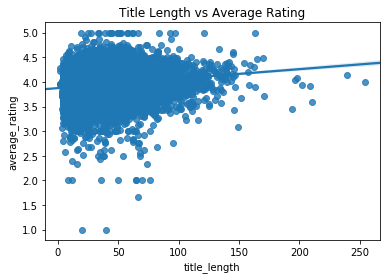

In [18]:
sns.regplot(x='title_length', y='average_rating', data=df)
corr, p_value = stats.pearsonr(df['average_rating'], df['title_length'])
print(corr)
plt.title('Title Length vs Average Rating')
plt.show()

In [19]:
df['author_count'] = df['authors'].apply(lambda x: len(x.split('-')))

0.025593989051848388


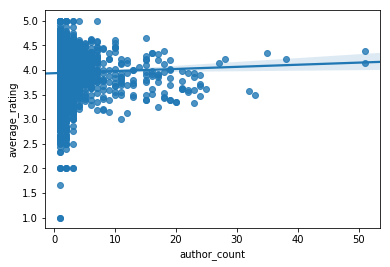

In [20]:
sns.regplot(x='author_count', y='average_rating', data=df)
corr, p_value = stats.pearsonr(df['average_rating'], df['author_count'])
print(corr)
plt.show()

Yikes, these are some really crappy features. We can still build models off of these and compare the effects of the two.....

We'll use average_rating as our target. Here we go!

### OLS regression model

In [21]:
dummies = pd.get_dummies(df.language_code, drop_first=True)
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']

X = pd.concat([dummies, df[features]], axis=1)
Y = df['average_rating']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [23]:
import statsmodels.api as sm
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     31.74
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          5.19e-162
Time:                        14:38:38   Log-Likelihood:                -1826.7
No. Observations:               10883   AIC:                             3711.
Df Residuals:                   10854   BIC:                             3923.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1913      0

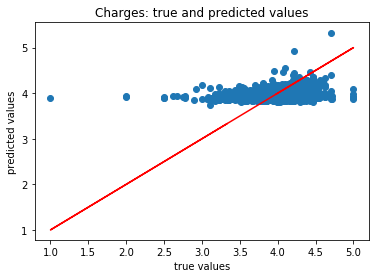

Mean squared error of the prediction is: 0.0826306827217442
Root mean squared error of the prediction is: 0.28745553172924715


In [24]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

Oof, not too great. Let's try again, but only use the features we find the most significant.

In [25]:
dummy2 = dummies[['swe', 'cat', 'glg']]
X = pd.concat([df[['num_pages', 'ratings_count', 'title_length']], dummy2], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [27]:
import statsmodels.api as sm
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          8.86e-142
Time:                        14:38:39   Log-Likelihood:                -1919.1
No. Observations:               10883   AIC:                             3852.
Df Residuals:                   10876   BIC:                             3903.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8007      0.006    609.574

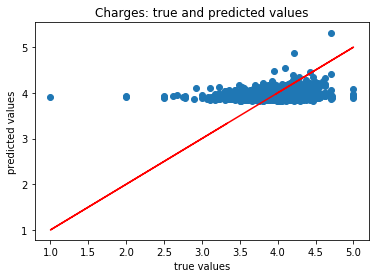

Mean squared error of the prediction is: 0.08398274602390927
Root mean squared error of the prediction is: 0.2897977674584628


In [28]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

Well, our RMSE increased and our r-squared slightly decreased. So this model doesn't perform well at all!

This is not a great model! Let's see how KNN compares, but I don't have high hopes...

### KNN

In [45]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler


knn = neighbors.KNeighborsRegressor(n_neighbors=10)

X = df[['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']]
Y = df['average_rating']



In [60]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Without weights

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

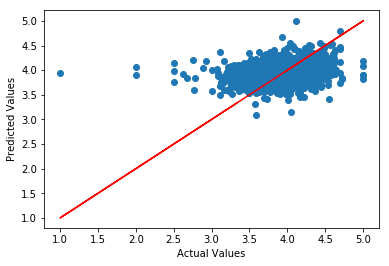

Mean squared error of the prediction is: 0.08398274602390927
Root mean squared error of the prediction is: 0.2897977674584628


In [62]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

### With weights

In [63]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = df[['num_pages', 'ratings_count', 'text_reviews_count', 'title_length', 'author_count']]
Y = df['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)

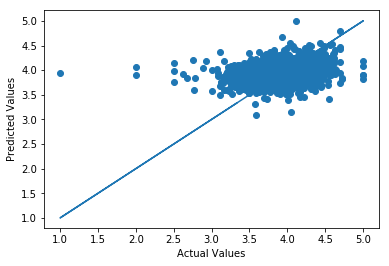

Mean squared error of the prediction is: 0.08398274602390927
Root mean squared error of the prediction is: 0.2897977674584628


In [64]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))

So, it seems that the KNN and OLS perform almost identical. Is this due to the data set, an incorrect usage on my part, or some other reason?